# Dimension Reduction: tests

### Load data

In [1]:
import sys, glob
import numpy as np
import pandas as pd
from tqdm import tqdm
sys.path.append('..')
from utils import *

/home/nvlaminc/Documents/Projects/Ariac/building/TRAIL_workshops/venv_workshop2022/lib64/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#To use new data format by hour (time_basis = 24 in plot_cluster)
file_path = '../../QuickStart/Data/Electricity/residential_all_hour_with_date_time.pkl'
x_date_time = pd.read_pickle(file_path)
ids = x_date_time.columns.values
df = x_date_time.sort_values(by='date_time')["2009-07-15" : "2010-12-31"]
x = np.array(df).T

In [3]:
#To use old data format by 30min (time_basis = 48 in plot_cluster)
file_path = '../../QuickStart/Data/Electricity/residential_all.pkl'
df = pd.read_pickle(file_path)
val = df['consumption'].values
ids = df['ID'].values
val_reshape = []
for i in tqdm(range(3639)):
    val_reshape.append(val[i*25728: (i+1)*25728])
x = np.array(val_reshape)

100%|██████████| 3639/3639 [00:00<00:00, 1807778.31it/s]


### No Dimension Reduction


In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(x)

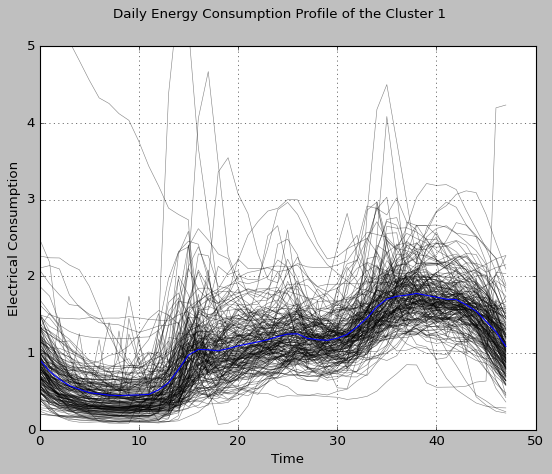

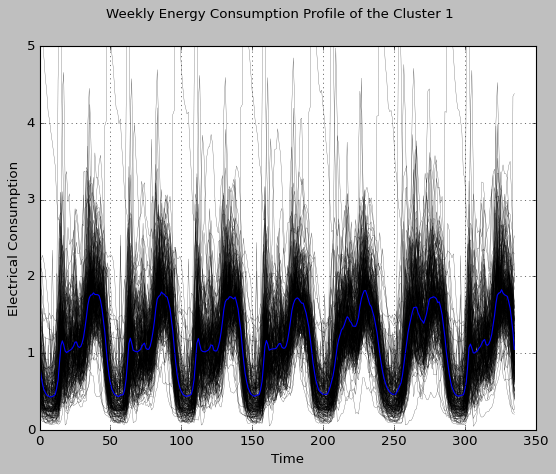

In [49]:
plot_cluster(x, kmeans.predict(x), cluster_id=0, period='day', time_basis = 48)
plot_cluster(x, kmeans.predict(x), cluster_id=0, period='week', time_basis = 48)

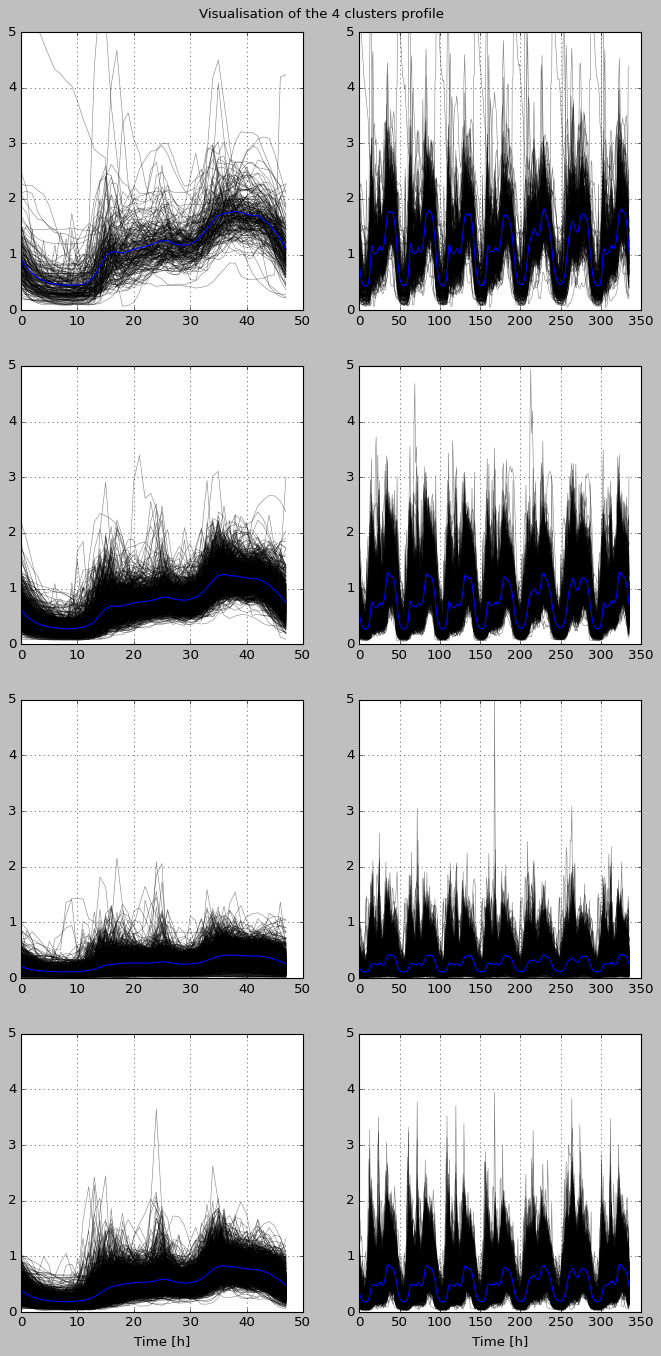

In [58]:
plot_clusters(x, kmeans.predict(x), time_basis = 48)

In [6]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_jobs=-1).fit_transform(x)

/home/nvlaminc/Documents/Projects/Ariac/building/TRAIL_workshops/venv_workshop2022/lib64/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nvlaminc/Documents/Projects/Ariac/building/TRAIL_workshops/venv_workshop2022/lib64/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


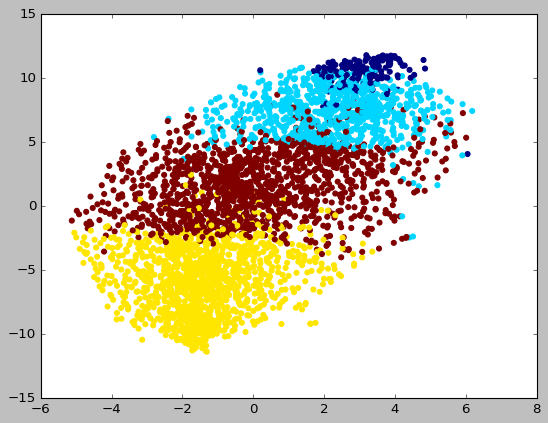

In [7]:
plt.scatter(tsne[:, 0], tsne[:, 1], c=kmeans.predict(x), edgecolors = "face")

### Principal Component Analysis (PCA)

Text(0, 0.5, '1 - Explained Variance Ratio')

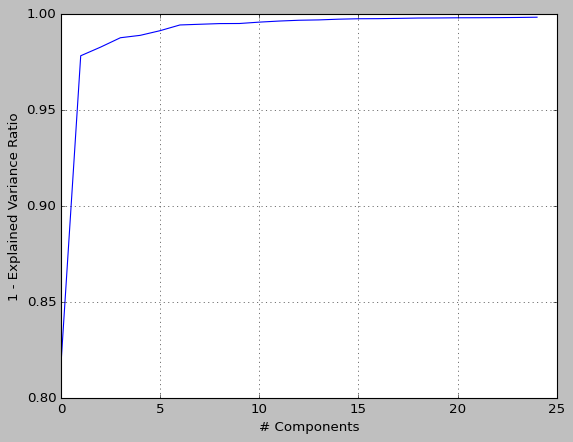

In [82]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=1000)

pca.fit(x)
plt.plot(1-pca.explained_variance_ratio_[:25])
plt.grid()

plt.xlabel('# Components')
plt.ylabel('1 - Explained Variance Ratio')

In [8]:
pca = PCA(n_components=10)
x_pca = pca.fit_transform(x)

In [12]:
kmeans_pca = KMeans(n_clusters=4, random_state=0).fit(x_pca)

In [13]:
kmeans_pca.predict(x_pca)

array([1, 3, 0, ..., 3, 2, 1], dtype=int32)

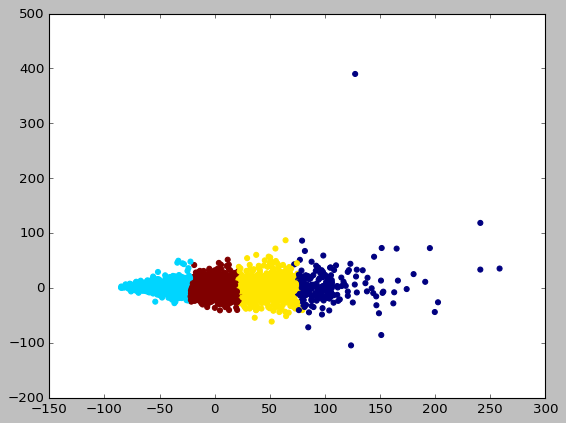

In [14]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_pca.predict(x_pca), edgecolors = "face")

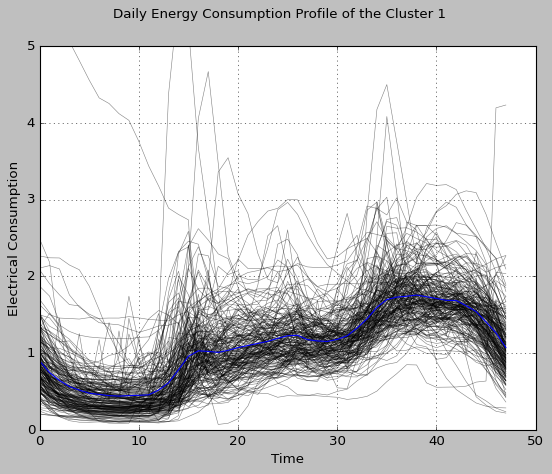

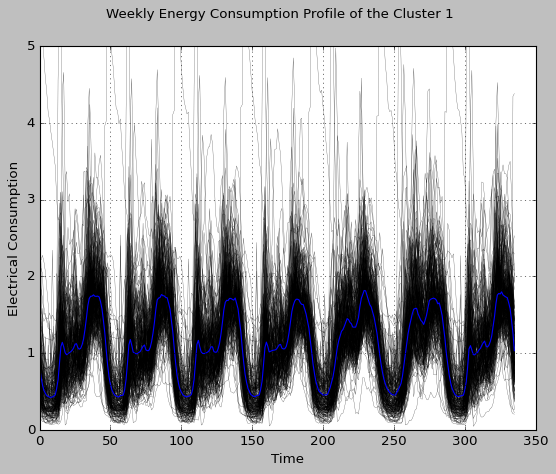

In [15]:
plot_cluster(x, kmeans_pca.predict(x_pca), cluster_id=0, period='day', time_basis = 48)
plot_cluster(x, kmeans_pca.predict(x_pca), cluster_id=0, period='week', time_basis = 48)

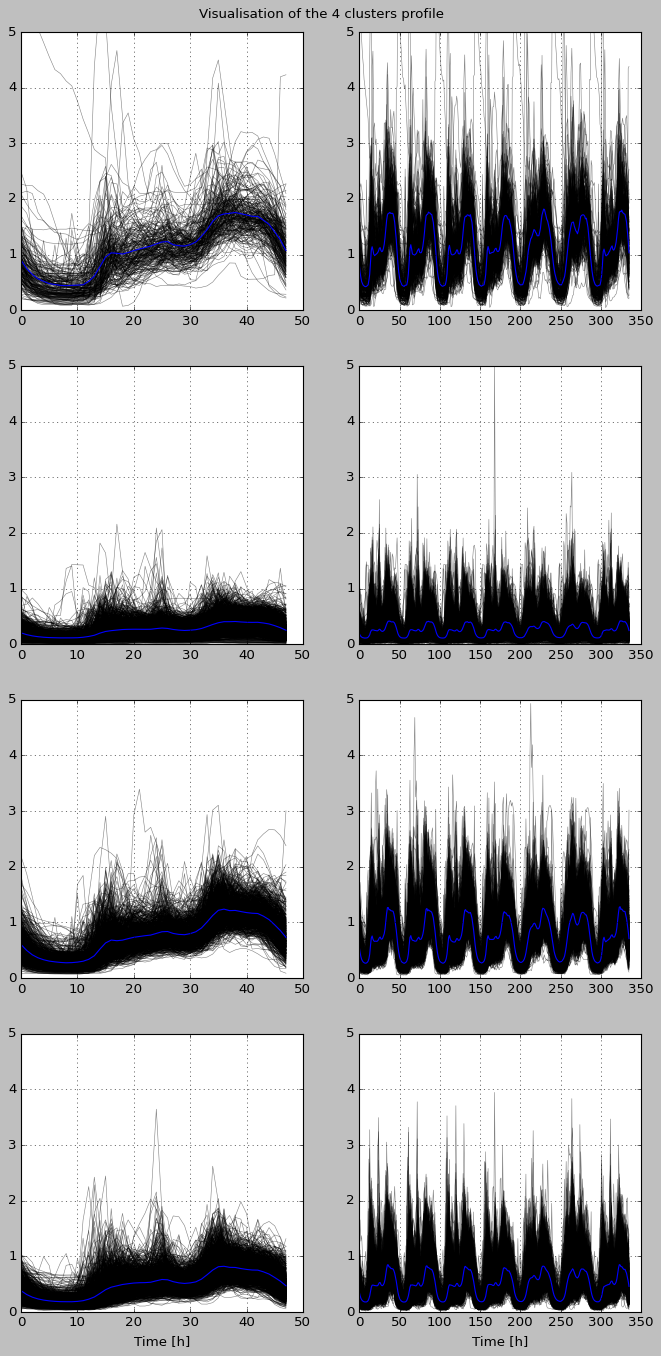

In [56]:
plot_clusters(x, kmeans_pca.predict(x_pca), time_basis = 48)

### Multidimensional Scaling (MDS)

In [18]:
import matplotlib.pyplot as plt 
from sklearn.manifold import MDS

mds = MDS(n_components=10, n_jobs=-1, verbose=2)
x_mds = mds.fit_transform(x)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


it: 0, stress 137745192043.72372
it: 0, stress 137754456683.8139
it: 0, stress 137743094341.8454
it: 0, stress 137745693881.2672
it: 1, stress 7470384940.143807
it: 1, stress 7301200559.169272
it: 1, stress 7445700872.600163
it: 1, stress 7287043789.196742
it: 2, stress 4480143229.979646
it: 2, stress 4470958773.435624
it: 2, stress 4491199780.908059
it: 2, stress 4453525210.272946
it: 3, stress 3882906325.7841563
it: 3, stress 3881498355.298379
it: 3, stress 3876670733.7534494
it: 3, stress 3884427037.1291957
it: 4, stress 3719790722.7541857
it: 4, stress 3723416134.1972637
it: 4, stress 3725697340.6864424
it: 4, stress 3726811019.111444
it: 5, stress 3664473475.3610477
it: 5, stress 3670946502.701367
it: 5, stress 3671954149.5340757
it: 5, stress 3672173787.6039658
it: 6, stress 3640913357.6852946
it: 6, stress 3648772953.043359
it: 6, stress 3649231535.352809
it: 6, stress 3649024538.8718657
it: 7, stress 3628681528.140152
it: 7, stress 3637775203.5532665
it: 7, stress 3637597249.84

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.6min finished


In [19]:
from sklearn.cluster import KMeans

kmeans_mds = KMeans(n_clusters=4, random_state=0).fit(x_mds)

In [20]:
kmeans_mds.predict(x_mds)

array([2, 1, 3, ..., 1, 3, 2], dtype=int32)

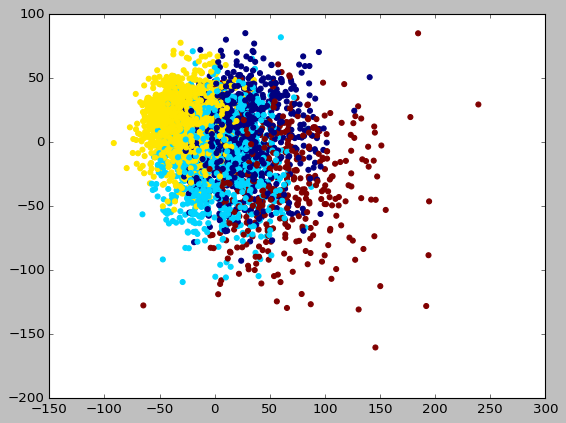

In [21]:
plt.scatter(x_mds[:, 0], x_mds[:, 1], c=kmeans_mds.predict(x_mds), edgecolors = "face")

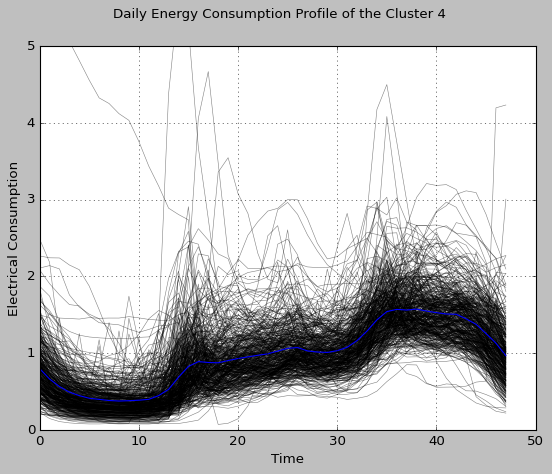

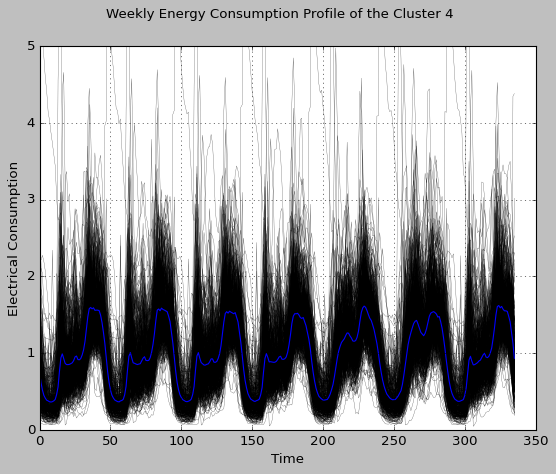

In [54]:
plot_cluster(x, kmeans_mds.predict(x_mds), cluster_id=3, period='day', time_basis = 48)
plot_cluster(x, kmeans_mds.predict(x_mds), cluster_id=3, period='week', time_basis = 48)

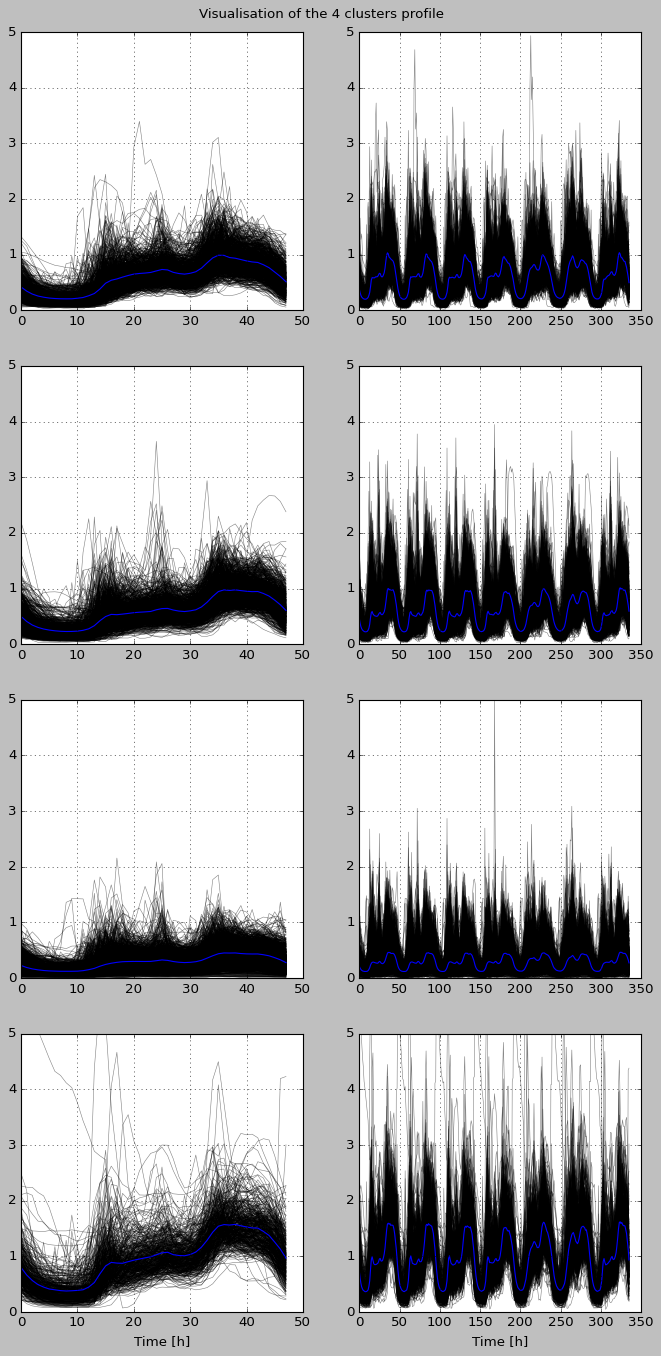

In [55]:
plot_clusters(x, kmeans_mds.predict(x_mds), time_basis = 48)

### Fast Fourier Transform

In [23]:
from scipy.fft import fft

x_fft = np.abs(fft(x, n=100))

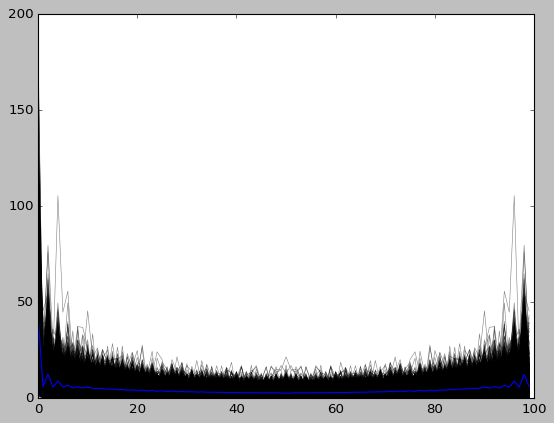

In [24]:
fig = plt.figure()
plt.plot(np.transpose(x_fft), c='black', linewidth=0.5, alpha=0.5)
plt.plot(x_fft.mean(0))

plt.show()

In [28]:
kmeans_fft = KMeans(n_clusters=4, random_state=0).fit(x_fft)

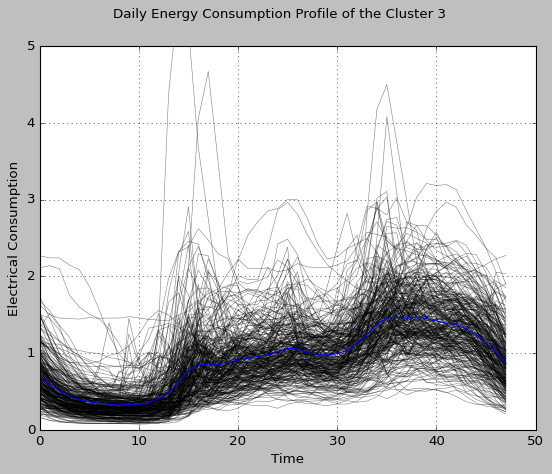

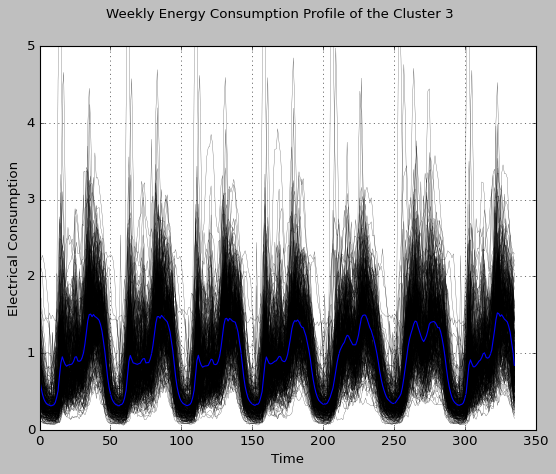

In [51]:
plot_cluster(x, kmeans_fft.predict(x_fft), cluster_id=2, period='day', time_basis = 48)
plot_cluster(x, kmeans_fft.predict(x_fft), cluster_id=2, period='week', time_basis = 48)

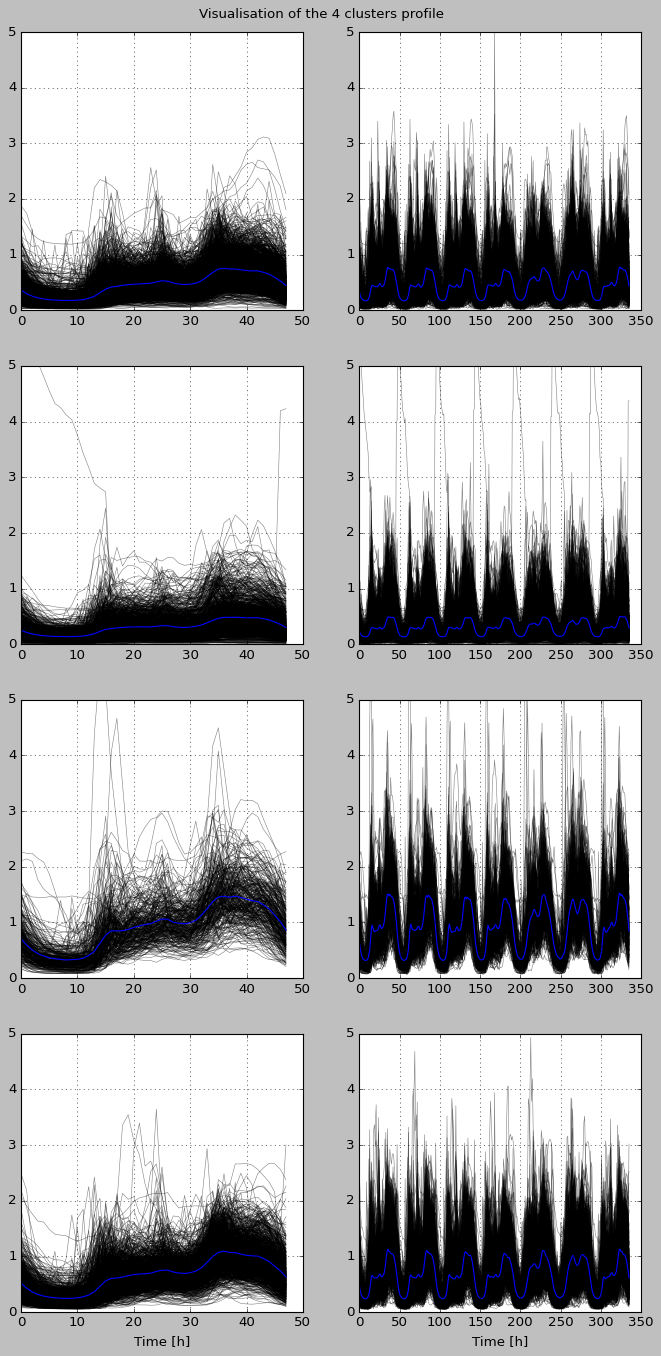

In [59]:
plot_clusters(x, kmeans_fft.predict(x_fft), time_basis = 48)

### Wavelet Transform

In [30]:
from scipy import signal

dwt = []
time_basis = 48

for i in tqdm(range(len(x))):
    sig = x[:, :7*time_basis*(x.shape[-1]//(time_basis*7))].reshape(x.shape[0], -1, 7, time_basis).mean(1)[i].flatten()
    widths = np.arange(1, 25)
    cwtmatr = signal.cwt(sig, signal.ricker, widths)[:, ::2]
    dwt.append(cwtmatr)
dwt = np.asarray(dwt)

100%|██████████| 3639/3639 [02:24<00:00, 25.19it/s]


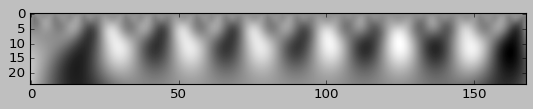

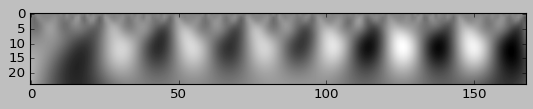

In [31]:
fig = plt.figure()

plt.imshow(dwt.mean(0), cmap='binary')

fig = plt.figure()

plt.imshow(dwt[np.random.randint(0, len(x))], cmap='binary')

x_dwt = dwt.reshape(len(dwt), -1)

In [37]:
import pywt
def multi_level_dwt(x, wav_func='coif5', level=None):
    c = pywt.wavedec(x, wavelet=wav_func, level=level)
    return c[0]

In [42]:
x_dwt = multi_level_dwt(x, wav_func="db8", level=5)

In [43]:
kmeans_dwt = KMeans(n_clusters=4, random_state=0).fit(x_dwt)

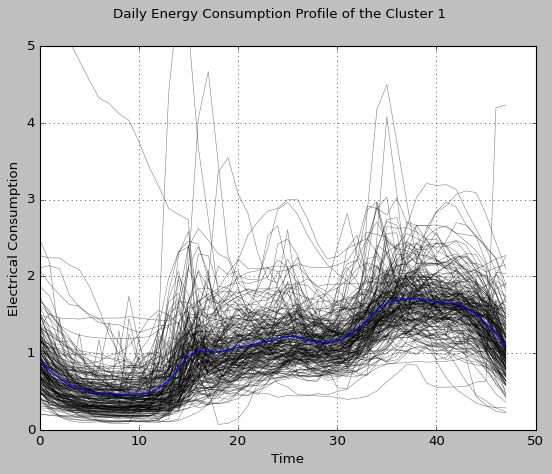

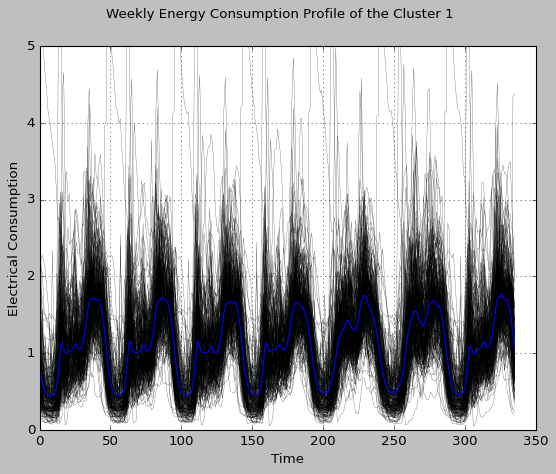

In [44]:
plot_cluster(x, kmeans_dwt.predict(x_dwt), cluster_id=0, period='day', time_basis = 48)
plot_cluster(x, kmeans_dwt.predict(x_dwt), cluster_id=0, period='week', time_basis = 48)

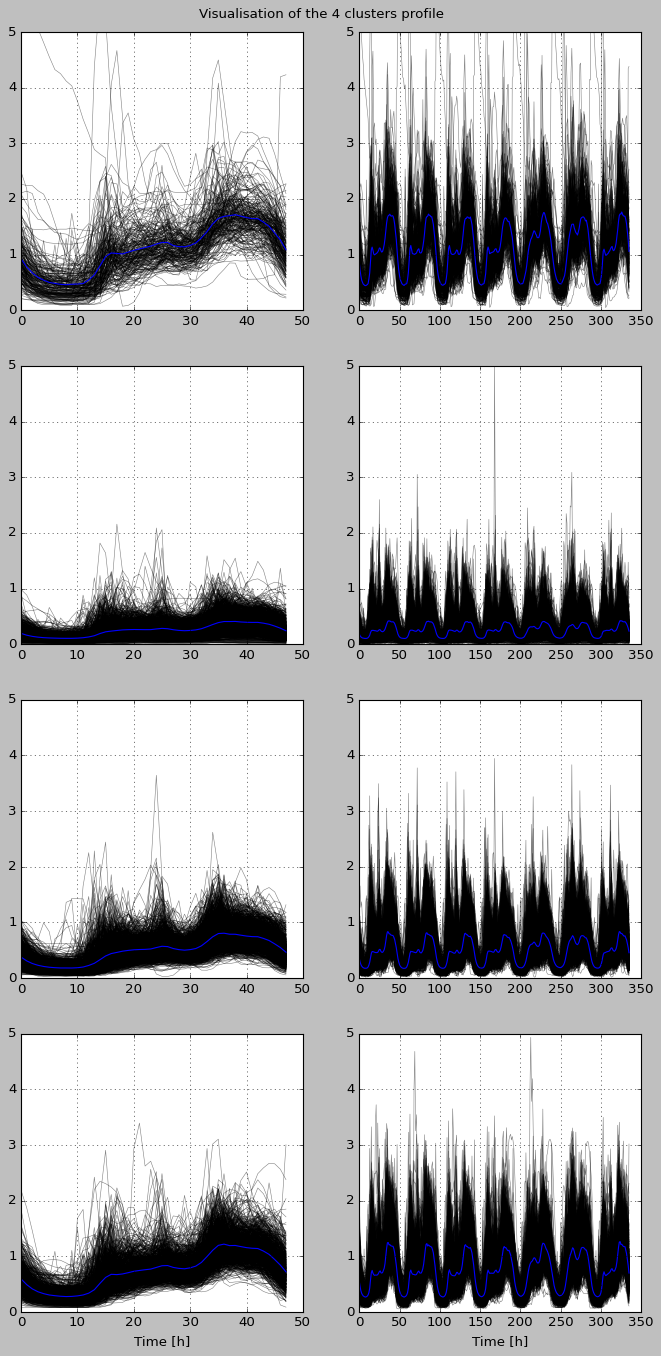

In [60]:
plot_clusters(x, kmeans_dwt.predict(x_dwt), time_basis = 48)

### Piecewise Constant Approximation

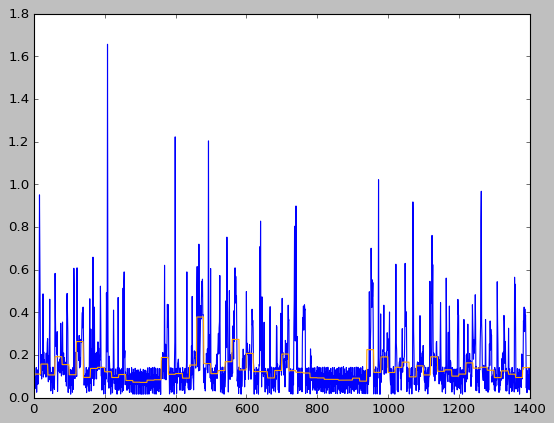

In [58]:
def piecewise_approx(sig, window=20, overlapping=True):
    sig_apca = []
    for t in range(len(sig)//window):
        for w in range(window):
            #sig_apca.append(sig[t*window:(t+1)*window].mean())
            sig_apca.append(np.median(sig[t*window:(t+1)*window]))
    return np.asarray(sig_apca)

sig = x[0]
sig_apca = piecewise_approx(sig)

import matplotlib.pyplot as plt 

plt.plot(sig[100:1500])
plt.plot(sig_apca[100:1500], "orange")